# Sentiment Analysis using LSTM (a deep RNN architecture)
# by Jalees Ur Rahman

#### Required Libraries that should be installed on your system before executing this code:
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. NLTK
6. Scikit-Learn
7. Tensorflow

## Data exploration

#### Dataset used in this project is downloaded from kaggle.com, provided by Saravia et al. (2018).

In [27]:
import pandas as pd
import numpy as np

trainData = pd.read_csv('data.csv')
lbls = list(trainData.Label.unique())
display(trainData)

print('Total emotions in the dataset are :\n', lbls)

,Line,Label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


Total emotions in the dataset are :
 ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


In [28]:
print('Sample line\t\t:\tLabel\n\n', trainData.Line[4],'  :\t', trainData.Label[4])

Sample line		:	Label

 i am feeling grouchy   :	 anger


## Data Cleaning:
1. Removal of special characters from sentences
2. Removal of stop words (is, am, are, the, has, have etc.)
3. Stemming: Process of reducing inflected words to their stem word (for example: stem for thinks, thinking and thought is think)

In [29]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    MAX_SEQUENCE_LENGTH = 0
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words and token != 'im':
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

# Line by line preprocess function calling
trainData.Line = trainData.Line.apply(lambda x: preprocess(x))

trainData

,Line,Label
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
17995,ssa examination tomorrow morning quite well pr...,sadness
17996,constantly worry fight nature push limits inne...,joy
17997,feel important share info experience thing,joy
17998,truly feel passionate enough something stay tr...,joy


In [30]:
print('Sample line \t :\tLabel\n\n', trainData.Line[4],':\t', trainData.Label[4])

Sample line 	 :	Label

 feeling grouchy :	 anger


### Tokenization
Converting of textual data to numeric data

In [31]:
# To get vocabularies. This returns vector of unique tokens
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(trainData.Line)

word_index = tokenizer.word_index
vocabulary_size = len(tokenizer.word_index) + 1
# print("Vocabulary : {}".format(word_index))

In [32]:
word_index

{'feel': 1,
 'feeling': 2,
 'like': 3,
 'really': 4,
 'know': 5,
 'time': 6,
 'little': 7,
 'get': 8,
 'people': 9,
 'want': 10,
 'would': 11,
 'still': 12,
 'think': 13,
 'one': 14,
 'ive': 15,
 'even': 16,
 'life': 17,
 'make': 18,
 'bit': 19,
 'something': 20,
 'much': 21,
 'love': 22,
 'things': 23,
 'going': 24,
 'dont': 25,
 'way': 26,
 'could': 27,
 'day': 28,
 'back': 29,
 'pretty': 30,
 'good': 31,
 'need': 32,
 'go': 33,
 'always': 34,
 'see': 35,
 'right': 36,
 'say': 37,
 'also': 38,
 'feelings': 39,
 'feels': 40,
 'today': 41,
 'work': 42,
 'around': 43,
 'cant': 44,
 'made': 45,
 'though': 46,
 'well': 47,
 'help': 48,
 'didnt': 49,
 'got': 50,
 'never': 51,
 'felt': 52,
 'someone': 53,
 'every': 54,
 'days': 55,
 'less': 56,
 'quite': 57,
 'happy': 58,
 'makes': 59,
 'enough': 60,
 'sure': 61,
 'find': 62,
 'lot': 63,
 'many': 64,
 'look': 65,
 'away': 66,
 'kind': 67,
 'home': 68,
 'anything': 69,
 'better': 70,
 'without': 71,
 'left': 72,
 'everything': 73,
 'person':

In [33]:
word_index['grouchy']

882

In [34]:
print('A sample lengthy sentence:\n\n', trainData.Line[17995])

A sample lengthy sentence:

 ssa examination tomorrow morning quite well prepared coming exam somehow feel numb towards exam life much important things exam


### Padding
To equalize the length of all sentences

In [35]:
from keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 20
lines = pad_sequences(tokenizer.texts_to_sequences(trainData.Line),
                        maxlen = MAX_SEQUENCE_LENGTH)

In [36]:
trainData.Line = lines.tolist()
trainData

,Line,Label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",sadness
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 2, 376, ...",sadness
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 314...",anger
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 2,...",love
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",anger
...,...,...
17995,"[0, 16046, 3176, 788, 126, 57, 47, 1692, 243, ...",sadness
17996,"[0, 0, 0, 0, 0, 0, 675, 807, 1038, 1056, 915, ...",joy
17997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",joy
17998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 277, 1, 1...",joy


### One Hot Encoding
Converting of labels to numeric and then to one hot encoded labels

In [10]:
labs = trainData.Label.values

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(np.array(labs))
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_labs = onehot_encoder.fit_transform(integer_encoded)
print('Labels after one hot endcoding: \n', onehot_encoded_labs)

Labels after one hot endcoding: 
 [[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


### Final Preprocessed dataset

In [37]:
trainData.Label = onehot_encoded_labs.tolist()
trainData

,Line,Label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 2, 376, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 314...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 2,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...
17995,"[0, 16046, 3176, 788, 126, 57, 47, 1692, 243, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
17996,"[0, 0, 0, 0, 0, 0, 675, 807, 1038, 1056, 915, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
17997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
17998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 277, 1, 1...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"


In [38]:
print('Sample line \t\t\t\t\t\t\t :\tLabel\n\n', trainData.Line[4],' :\t', trainData.Label[4])

Sample line 							 :	Label

 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 882]  :	 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Data Splitting

In [39]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(trainData, test_size=0.2)

y_train = np.vstack(train_data.Label.values)
y_test = np.vstack(test_data.Label.values)

x_train = np.vstack(train_data.Line.values)
x_test = np.vstack(test_data.Line.values)

In [40]:
test_data

,Line,Label
1052,"[0, 0, 0, 0, 13, 8, 1233, 1056, 918, 2, 32, 13...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
684,"[0, 0, 0, 0, 0, 0, 129, 455, 9, 2589, 173, 23,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
731,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
6343,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
6844,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...
16629,"[0, 0, 0, 0, 211, 2689, 15387, 718, 373, 168, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
7526,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
11197,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 287, 57, 61, 13...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
4869,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1372, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"


## Model Architecture

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(input_dim=vocabulary_size,output_dim=200,trainable=True))

# LSTM layer
model.add(LSTM(64, activation='relu'))

# Fully connected layer
model.add(Dense(64, activation='sigmoid'))

# Output layer
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         3209400   
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                67840     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
Total params: 3,281,790
Trainable params: 3,281,790
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=15, batch_size=512,
                    verbose=1,shuffle=True,validation_split=0.20)

Train on 11520 samples, validate on 2880 samples
Epoch 1/15
11520/11520 [==============================] - 7s 627us/sample - loss: 1.8593 - accuracy: 0.2734 - val_loss: 1.6132 - val_accuracy: 0.3153
Epoch 2/15
11520/11520 [==============================] - 5s 472us/sample - loss: 1.5622 - accuracy: 0.3469 - val_loss: 1.5347 - val_accuracy: 0.4392
Epoch 3/15
11520/11520 [==============================] - 5s 441us/sample - loss: 1.4376 - accuracy: 0.4463 - val_loss: 1.3347 - val_accuracy: 0.5097
Epoch 4/15
11520/11520 [==============================] - 5s 437us/sample - loss: 1.0630 - accuracy: 0.6141 - val_loss: 0.9827 - val_accuracy: 0.6257
Epoch 5/15
11520/11520 [==============================] - 5s 445us/sample - loss: 0.6280 - accuracy: 0.8237 - val_loss: 0.7249 - val_accuracy: 0.7694
Epoch 6/15
11520/11520 [==============================] - 5s 449us/sample - loss: 0.3979 - accuracy: 0.8994 - val_loss: 0.6279 - val_accuracy: 0.7955
Epoch 7/15
11520/11520 [===========================

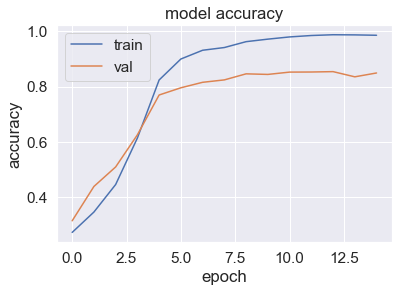

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Testing

### Confusion Matrix of testing data

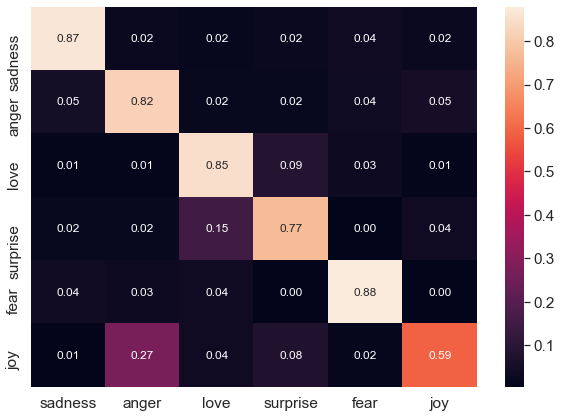

Model testing accuracy is 84.08333333333333


In [46]:
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

labelList=lbls
pred=model.predict(x_test)

test_Y_max=np.argmax(y_test, axis=-1)
predictions=np.argmax(pred, axis=-1)

cm=confusion_matrix(test_Y_max,predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = pd.DataFrame(cm, labelList,labelList )# matrix,names row,names col,
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt=".2f") # font size
plt.show()
test_acc = accuracy_score(test_Y_max,predictions)
print('Model testing accuracy is {}'.format(test_acc * 100))

## Dataset Reference:
[1] Saravia, E., Liu, H.C.T., Huang, Y.H., Wu, J. and Chen, Y.S., 2018. Carer: Contextualized affect representations for emotion recognition. In Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing (pp. 3687-3697).

## Contact me for queries

##### JALEES@GIKI.EDU.PK

# The End